In [52]:
import pandas as pd

In [53]:
df = pd.read_csv("DATASET/thyroidDF.csv")

In [54]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,63,F,t,f,f,t,f,f,f,f,...,48.0,t,1.02,t,47.0,f,NaN,other,F,840815067
1,75,F,f,f,f,f,f,f,f,f,...,157.0,t,0.89,t,176.0,f,NaN,SVI,A,840816008
2,41,F,f,f,f,f,f,f,f,f,...,33.0,t,1.07,t,31.0,f,NaN,other,F,840816061
3,61,M,f,f,f,t,f,f,f,f,...,114.0,t,0.84,t,136.0,f,NaN,other,G,840817062
4,27,F,f,f,f,f,f,f,f,f,...,7.5,t,0.94,t,7.5,f,NaN,other,F,840820014


In [55]:
df.drop(["patient_id"], axis=1, inplace=True)

In [56]:
df.drop_duplicates(inplace=True)

In [57]:
import pandas as pd
import numpy as np

def fill_nulls_with_random(df):
    # Identify numerical columns
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    
    # Loop through each numerical column
    for col in numerical_columns:
        # Check for null values
        if df[col].isnull().sum() > 0:
            # Get lower and upper bounds (min and max of non-null values)
            lower_bound = df[col].min()
            upper_bound = df[col].max()
            
            # Generate random numbers to fill the null values
            # We only generate numbers for the number of NaNs in the column
            random_values = np.random.uniform(lower_bound, upper_bound, df[col].isnull().sum())
            
            # Fill NaN values with generated random numbers
            df.loc[df[col].isnull(), col] = random_values
    
    return df

df_filled = fill_nulls_with_random(df)

In [58]:
# Filter for object (categorical) columns
object_df = df.select_dtypes(include='object')

# Function to fill null values with random values from unique values of the column
def fill_na_with_random_choice(column):
    if column.isnull().any():  # Check if there are NaNs in the column
        unique_values = column.dropna().unique()  # Get unique values, excluding NaNs
        if len(unique_values) > 0:
            # Generate random choices for each NaN
            random_choices = np.random.choice(unique_values, size=column.isnull().sum())
            column.fillna(pd.Series(random_choices, index=column[column.isnull()].index), inplace=True)

# Apply the function to each object column
for col in object_df.columns:
    fill_na_with_random_choice(df[col])

In [59]:
# Filter for object (categorical) columns
object_df = df.select_dtypes(include='object')

# Identify object columns with fewer than 2 unique values
columns_with_fewer_than_two_classes = [
    col for col in object_df.columns
    if object_df[col].nunique() < 2
]

print("Object columns with fewer than 2 unique values:\n", columns_with_fewer_than_two_classes)

Object columns with fewer than 2 unique values:
 []


In [60]:
#label encoding the object data.

from sklearn.preprocessing import LabelEncoder

# Store original column names
original_columns = df.select_dtypes(include='object').columns

# Initialize LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical variable
for col in original_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Print the mapping between original categories and numerical labels
for col, encoder in label_encoders.items():
    print(f"Mapping for column '{col}':")
    for label, category in enumerate(encoder.classes_):
        print(f"Label {label}: {category}")
    print("===============================")

Mapping for column 'sex':
Label 0: F
Label 1: M
Mapping for column 'on_thyroxine':
Label 0: f
Label 1: t
Mapping for column 'query_on_thyroxine':
Label 0: f
Label 1: t
Mapping for column 'on_antithyroid_meds':
Label 0: f
Label 1: t
Mapping for column 'sick':
Label 0: f
Label 1: t
Mapping for column 'pregnant':
Label 0: f
Label 1: t
Mapping for column 'thyroid_surgery':
Label 0: f
Label 1: t
Mapping for column 'I131_treatment':
Label 0: f
Label 1: t
Mapping for column 'query_hypothyroid':
Label 0: f
Label 1: t
Mapping for column 'query_hyperthyroid':
Label 0: f
Label 1: t
Mapping for column 'lithium':
Label 0: f
Label 1: t
Mapping for column 'goitre':
Label 0: f
Label 1: t
Mapping for column 'tumor':
Label 0: f
Label 1: t
Mapping for column 'hypopituitary':
Label 0: f
Label 1: t
Mapping for column 'psych':
Label 0: f
Label 1: t
Mapping for column 'TSH_measured':
Label 0: f
Label 1: t
Mapping for column 'T3_measured':
Label 0: f
Label 1: t
Mapping for column 'TT4_measured':
Label 0: f
La

In [61]:
X = df.drop(["target"], axis=1)
y = df["target"]

In [62]:
from sklearn.feature_selection import SelectKBest, f_classif

# Initialize SelectKBest with the desired scoring function and k=10 (10 best features)
selector = SelectKBest(score_func=f_classif, k=10)

# Fit the selector
selector.fit(X, y)

# Get the feature scores for each feature
scores = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame with feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': scores,
    'P-Value': p_values
})

# Sort the DataFrame by Score in descending order
feature_scores_sorted = feature_scores.sort_values(by='Score', ascending=False)

# top 10 features
top_10_features = feature_scores_sorted.head(10)

# Retrieve the column names of the top 10 features
top_10_feature_names = top_10_features['Feature'].tolist()

# Filter the original DataFrame to include only the top 10 features
df_top_10 = df[top_10_feature_names]

In [63]:
# Split the data Into X and y (X has all features and y has target variable)
X = df_top_10
y = y

In [64]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [67]:
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [68]:
tomek = TomekLinks()
X_resampled, y_resampled = tomek.fit_resample(X_smote, y_smote)

In [69]:
# Convert the resampled data into DataFrames
X_train_res_df = pd.DataFrame(X_resampled, columns=X_train.columns)
y_train_res_df = pd.DataFrame(y_resampled, columns=[y_train.name])  # y_train.name preserves the original target column name

# Combine the features and target into one DataFrame (preprocessed data)
df = pd.concat([X_train_res_df, y_train_res_df], axis=1)

In [70]:
# remove duplicates
print("Duplicates before drop:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates before drop:", df.duplicated().sum())

Duplicates before drop: 3
Duplicates before drop: 0


In [71]:
# Split the data into features and target
X = df.drop("target", axis=1) # Features
y = df["target"] # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [72]:
X_train

,TT4,tumor,TSH_measured,FTI,pregnant,TSH,query_hyperthyroid,T4U,on_antithyroid_meds,query_hypothyroid
2075,55.926628,0,1,340.412070,0,5.569992,0,1.449758,0,0
129,181.000000,0,0,174.000000,0,116.791540,1,1.040000,0,0
589,162.000000,0,0,200.000000,0,124.461863,0,0.810000,0,0
1443,224.333091,0,1,402.958545,0,12.428460,0,0.593657,0,0
761,151.352019,0,1,183.431987,0,0.141416,0,0.826816,0,0
...,...,...,...,...,...,...,...,...,...,...
942,117.670178,0,1,123.715791,0,0.120175,0,0.949544,0,0
960,73.413487,0,1,70.414661,0,0.185425,0,1.019155,0,0
437,56.000000,0,1,59.000000,0,15.000000,0,0.950000,0,0
216,87.000000,0,1,92.000000,0,62.000000,0,0.940000,0,1


C:\Users\0945\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [13:01:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Testing Accuracy for XGBoost: 0.9870

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        87
           1       0.99      1.00      0.99        87
           2       1.00      1.00      1.00        88
           3       0.98      0.97      0.97        87
           4       1.00      1.00      1.00        87
           5       0.97      1.00      0.98        86
           6       0.98      0.94      0.96        85
           7       0.99      1.00      0.99        87

    accuracy                           0.99       694
   macro avg       0.99      0.99      0.99       694
weighted avg       0.99      0.99      0.99       694

[[86  1  0  0  0  0  0  0]
 [ 0 87  0  0  0  0  0  0]
 [ 0  0 88  0  0  0  0  0]
 [ 0  0  0 84  0  0  2  1]
 [ 0  0  0  0 87  0  0  0]
 [ 0  0  0  0  0 86  0  0]
 [ 0  0  0  2  0  3 80  0]
 [ 0  0  0  0  0  0  0 87]]


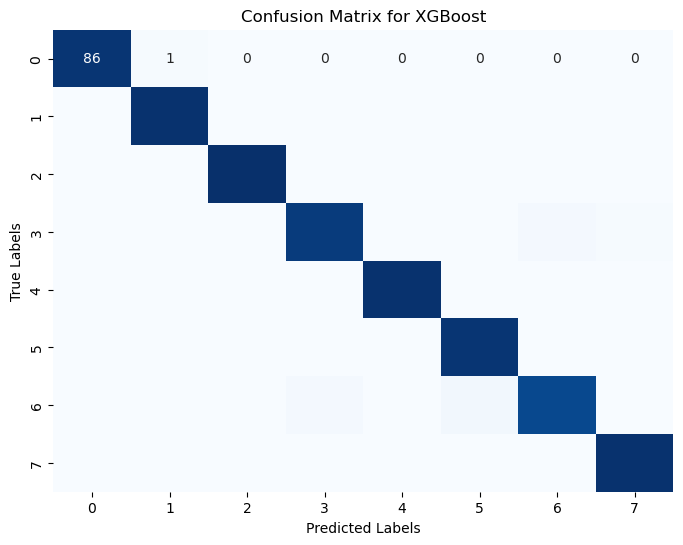

Classifier: XGBoost, PFI Score: 0.1254264524103832


In [73]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

# Initialize XGBoost classifier
xgboost_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Step 1: Train the classifier and compute Permutation Feature Importance (PFI)
xgboost_clf.fit(X_train, y_train)
y_pred = xgboost_clf.predict(X_test)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy for XGBoost: {test_accuracy:.4f}")

# Generate the classification report
report = classification_report(y_test, y_pred)
print(f"\nClassification Report for XGBoost:")
print(report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=xgboost_clf.classes_, yticklabels=xgboost_clf.classes_)
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Compute Permutation Feature Importance (PFI)
pfi = permutation_importance(xgboost_clf, X_train, y_train, n_repeats=10, random_state=42)
pfi_score = np.mean(pfi.importances_mean)
print(f"Classifier: XGBoost, PFI Score: {pfi_score}")
print("=============================================================")


In [74]:
#!pip install catboost

Testing Accuracy for CatBoost: 0.9885

Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        87
           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00        88
           3       0.97      0.97      0.97        87
           4       1.00      1.00      1.00        87
           5       0.99      1.00      0.99        86
           6       0.96      0.95      0.96        85
           7       0.99      1.00      0.99        87

    accuracy                           0.99       694
   macro avg       0.99      0.99      0.99       694
weighted avg       0.99      0.99      0.99       694

[[86  0  0  0  0  0  0  1]
 [ 0 87  0  0  0  0  0  0]
 [ 0  0 88  0  0  0  0  0]
 [ 0  0  0 84  0  0  3  0]
 [ 0  0  0  0 87  0  0  0]
 [ 0  0  0  0  0 86  0  0]
 [ 0  0  0  3  0  1 81  0]
 [ 0  0  0  0  0  0  0 87]]


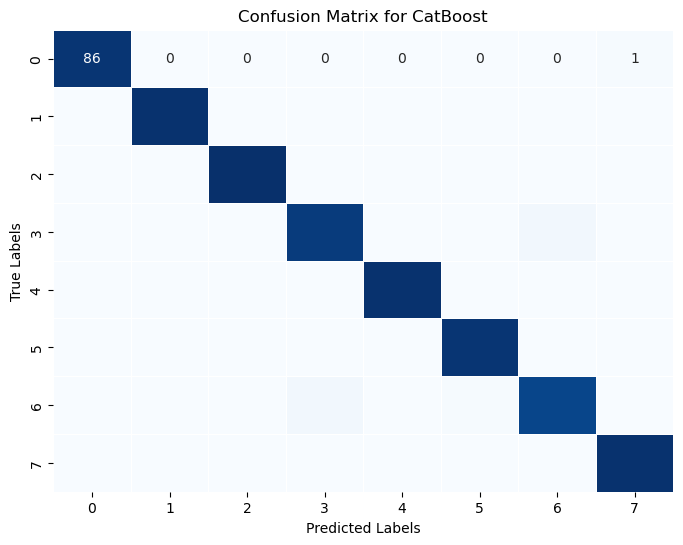

Classifier: CatBoost, PFI Score: 0.1399814585908529


In [75]:
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

# Initialize CatBoost classifier
catboost_clf = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=0)

# Step 1: Train the classifier and compute Permutation Feature Importance (PFI)
catboost_clf.fit(X_train, y_train)
y_pred = catboost_clf.predict(X_test)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy for CatBoost: {test_accuracy:.4f}")

# Generate the classification report
report = classification_report(y_test, y_pred)
print(f"\nClassification Report for CatBoost:")
print(report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=catboost_clf.classes_, yticklabels=catboost_clf.classes_,
            linewidths=0.5)  # Added linewidths for clarity
plt.title('Confusion Matrix for CatBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Compute Permutation Feature Importance (PFI)
pfi = permutation_importance(catboost_clf, X_train, y_train, n_repeats=10, random_state=42)
pfi_score = np.mean(pfi.importances_mean)
print(f"Classifier: CatBoost, PFI Score: {pfi_score}")
print("=============================================================")
